#  Исследование рынка видеоигр: интернет-магазин Стримчик

Описание проекта: 
Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Необходимо выявить определяющие успешность игры закономерности и определить потенциально популярный продукт для дальнейшего планирования  рекламных кампаний.

**Описание данных**

- Name — название игры

- Platform — платформа

- Year_of_Release — год выпуска

- Genre — жанр игры

- NA_sales — продажи в Северной Америке (миллионы долларов)

- EU_sales — продажи в Европе (миллионы долларов)

- JP_sales — продажи в Японии (миллионы долларов)

- Other_sales — продажи в других странах (миллионы долларов)

- Critic_Score — оценка критиков (максимум 100)

- User_Score — оценка пользователей (максимум 10)

- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг. Откроем файл с данными и изучим общую информацию

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
!pip install downcast
from downcast import reduce
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.simplefilter('ignore')

Чтение файла

In [2]:
df = pd.read_csv('/datasets/games.csv')

Изучим общую информацию 

In [3]:
df_list = [df]
for df in df_list:
  display(df.sample(5))
  df.info()
  display(df.isna().sum())
  display(df.describe())
  display(df.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12333,Mario vs. Donkey Kong: Tipping Stars,3DS,2015.0,Puzzle,0.00,0.00,0.06,0.00,70.0,7.5,E
12862,History Great Empires: Rome,DS,2009.0,Strategy,0.05,0.00,0.00,0.00,42.0,tbd,E10+
11273,1 vs. 100,DS,2008.0,Misc,0.08,0.00,0.00,0.01,38.0,3.2,E
15394,T.A.C. Heroes : Big Red One,DS,2010.0,Strategy,0.02,0.00,0.00,0.00,NaN,tbd,E10+
7560,Jillian Michaels' Fitness Adventure,X360,2011.0,Misc,0.17,0.02,0.00,0.01,NaN,tbd,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


0

In [4]:
len(df['Name'].unique())

11560

**Вывод**

В ходе первичного ознакомления с даннами обнаружено:

- всего 16715 строк;
- 11560 уникальных наименований игр;
- есть пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating; 
- в столбце Year_of_Release неверный формат данных;
- дубликатов нет.

Во-первых, необходимо скорректировать названия всех колонок.
Во-вторых, необходимо произвести изменение типа данных в следующих колонках:
на категориальный: Platform, Genre, Rating
на числовой, целочисленный: Year_of_Release
на числовой, десятичный - User_Score

В третьих, заменить пустые значения в столбцах rating, user_score, critic_score. Заменить имеющиеся пустые значения в таблице: year of release на года от той же игры только другой платформы, в остальных случаях решим в процессе предобработки

В столбце оценок от игроков user_score присутствуют значения tbd, что означают to be determined (будет определено). Скорее всего, игроки еще не дали своих оценок данным играм на тот момент

## Шаг. Подготовим данные

### Заменим названия столбцов (приведем к нижнему регистру)

In [5]:
df.columns = df.columns.str.lower()

### Преобразуем данные в нужные типы и обработаем пропуски

#### Приведем данные к целочисленному виду в столбце year_of_release, пропуски заменим на 0

In [6]:
df = df.query('year_of_release > 1994')
df['year_of_release']=df['year_of_release'].fillna(0).astype(int)

Срез сделан для того, чтобы исключить некорректные данные по годам.

#### Оценку пользователей (user_score) приведем к десятичному числовому типу, значения tbd заменем на NaN, т.к. по ним не определились с рейтингом и неизвестно каким он будет


In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'] = df['user_score'].astype('float64')

#### Обработаем пропуски: name, year_of_release, genre, critic_score, user_score и rating

In [8]:
display(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7979
user_score         8499
rating             6195
dtype: int64

Удалим пропуски в столбцах name, genre (за их малым количеством)

In [9]:
df.dropna(subset=['name', 'genre'], inplace=True)

Заполнить пропуски в столбцах critic_score, user_score и rating будет некорректно, т.к. в этом случае можем получить неточные результаты статистического анализа, но пропуски в этих столбцах заменим на значение, которое в последствии сможем всегда отфильтровать при необходимости.

In [10]:
# пропуски в столбцах critic_score, user_score заменим специальным маркером 999
df[['critic_score', 'user_score']] = df[['critic_score', 'user_score']].fillna(999)
# пропуски в столбце rating заменим специальным маркером 'RP'
df[['rating']] = df[['rating']].fillna('RP')

Пропуски в столбце year_of_release, возможно, связаны с тем, что игры не вышли в релиз на момент состава датасета. Пропуски в  столбцах critic_score, user_score и rating, возможно тоже связаны с тем, что на момент сбора данных пользователи и критике не определились с оценкой игры. 

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [11]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,999.0,999.0,RP,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,999.0,999.0,RP,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,999.0,999.0,RP,23.09


## Шаг. Проведем исследовательский анализ данных

### Посчитаем количество игр выпущенные в разные годы

Создадим таблицу по годам выпуска и количеству выпущенных игр в каждом году

In [12]:
games_period_year = (df[['name', 'year_of_release']]
.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values('year_of_release', ascending=False))

Построим гистограмму по количеству выпущенных игр по годам и построим ее по всем данным в датасете

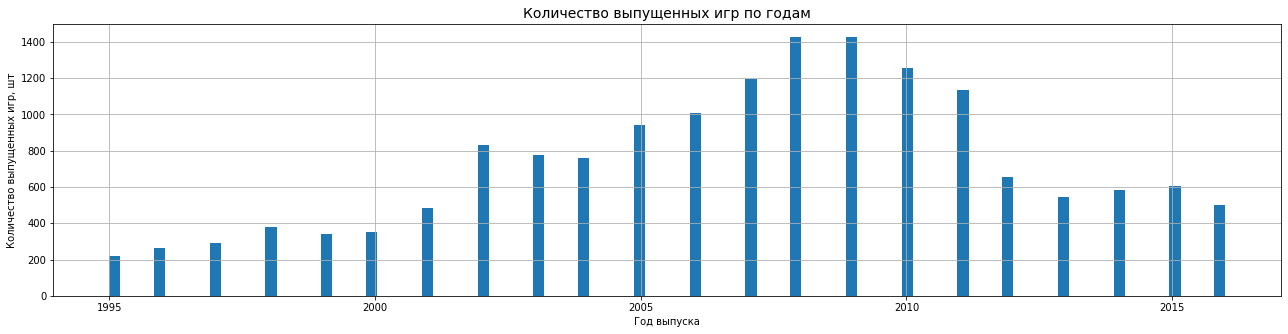

In [14]:
df.query('1994<year_of_release<2017')['year_of_release'].hist(bins=100, figsize=(22,5))
plt.title('Количество выпущенных игр по годам', size=14)
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр, шт')
plt.show()

**Вывод**

Из диаграммы видно, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как Стив Джобс в Сан-Франциско презентовал первый iPhone и его сенсорный экран, который позволил осуществлять контроль движения, массово начали создавать мобильные приложения и мобильные игры, которые способствовали спаду консольных игр, и уже с 2012г менялись несущественно.

###  Изучим изменение продаж по платформам

Создадим таблицу мировых продаж по каждой платформе и упорядочим данные по объему продаж

In [15]:
sales_for_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

Создадим функцию, строящую столбчатую диаграмму по количеству продаж по платформам 

In [16]:
def games_plot(data):
    data.plot(y='total_sales', legend=False, kind = 'bar', title='Количество продаж по платформам', figsize=(15, 7)).set(xlabel='Платформа',ylabel='Мировые продажи, млн копий')
    plt.show()

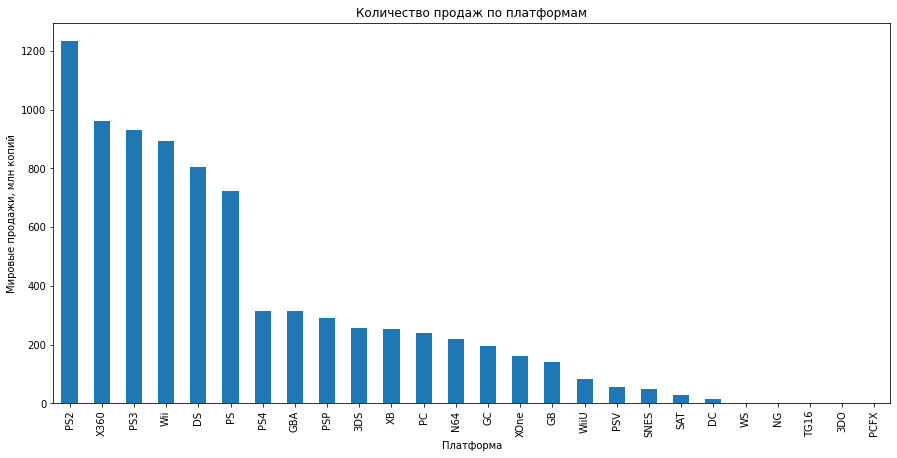

In [17]:
games_plot(sales_for_platform)

Возьмем первых 10 самых популярных платформ 

In [18]:
top_10_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)
top_10_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,721.55
PS4,314.14
GBA,312.88
PSP,289.53


Напишем функцию распределение продаж по годам для наиболее прибыльных платформ 

In [19]:
def year_total_sale_for_platform(name, data):
    return (data.query('platform == @name').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values('year_of_release', ascending=False))

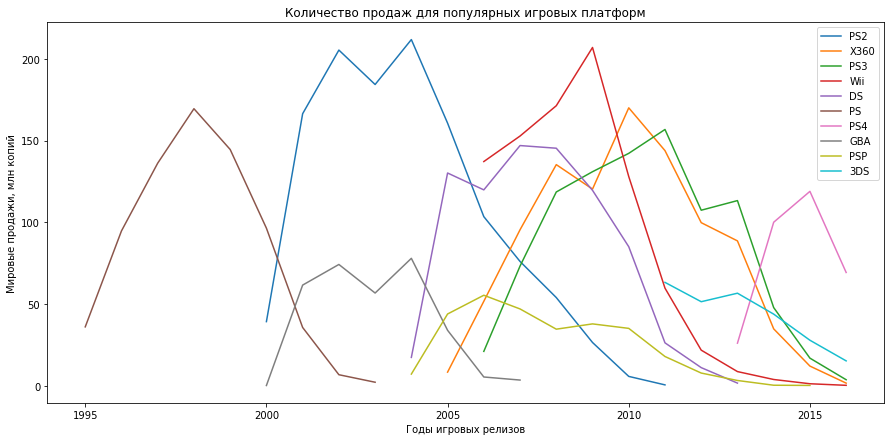

In [20]:
for i in list(top_10_platforms.index):
    year_total_sale_for_platform(i, df)['total_sales'].plot(figsize=(15, 7), label=i, title='Количество продаж для популярных игровых платформ').set(xlabel='Годы игровых релизов', ylabel='Мировые продажи, млн копий')
    plt.legend()

**Вывод**

Как видно на графике, практически все игровые платформы в среднем существуют по 10 лет. Игровой платформе нужно около 10 лет чтобы пережить свои стадии жизненного цикла продукта(внедрение на рынок, рост, зрелость и спад). Пик наступает примерно через 5 лет после выхода платформы. Самое большое количество игр было у Playstation 2(PS2). Она пережила два пика популярности с 2000 по 2005 года.

Таким образом актуальным периодом будет от 2011 года до 2016 года. 

Согласна с тем, что интервал в 10 лет захватывает отжившие тренды, поэтому актуальным периодом будет с 2011г до 2016г. Срок 5 лет. 
Хвост до 85г в платформе DS связан с некорректным заполнением данных в столбце 'year_of_release', поправила.


In [21]:
# используем данные с 2011 г по 2016 г
necessary_years = (df['year_of_release'] > 2011) & (df['year_of_release'] <= 2016)
necessary_games = df.loc[necessary_years]

### Выясним какие платформы лидируют или падают по продажам

In [22]:
total_sales_necessary_games = necessary_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).head(10)
total_sales_necessary_games

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Построим гистограмму количества продаж по платформам за актуальный период 

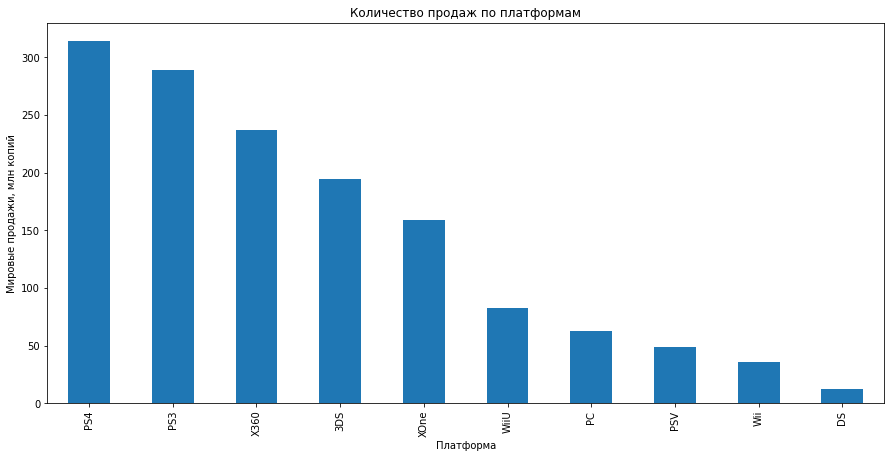

In [23]:
games_plot(total_sales_necessary_games)

Напишем функцию распределение продаж по годам для наиболее прибыльных платформ за период 2011г по 2016г 

In [24]:
def top_10_2011_2016(name, data):
    slicee = data[(df['platform'] == name) & (df['year_of_release'] > 2011)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

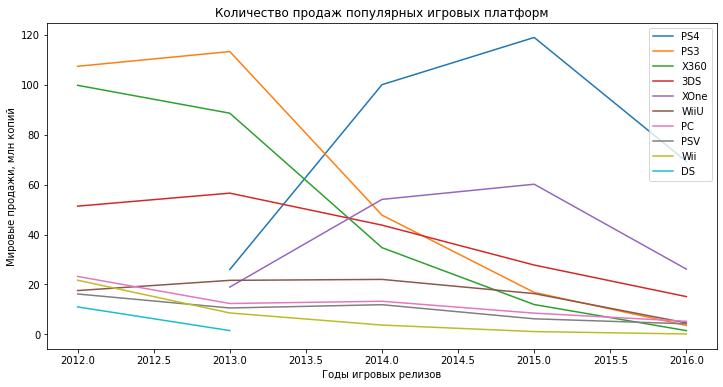

In [25]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Мировые продажи, млн копий')

for i in list(total_sales_necessary_games.index):
    sns.lineplot(data=top_10_2011_2016(i,df)['total_sales'], label=i)
    plt.legend()

**Вывод**
Как видно на графике, популярные консоли (PS3, Xbox360) уже пришли к спаду в 2016 году. 
Их коллеги нового поколения(XOne, PS4)также уже пережили свой пик расцвета
однако остаются наиболее потенциально прибыльными платформами. 

### Построим графики «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [26]:
# cохраним в переменной df_top_5_platforms топ 5 платформ и избавимся от выбросов
list_of_top5 = ['PS4','PS3', 'X360','3DS','XOne']
df_top_5_platforms = df[df['platform'].isin(['PS4','PS3', 'X360','3DS','XOne'])]
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['total_sales']<1.4]

Заменила, топ платформ на актуальные. Ограничение 1.4 стоит для того, что график был наглядным, если этого не сделать, то из-за выбросов график будет не читаем. 

Text(0, 0.5, 'Глобальные продажи')

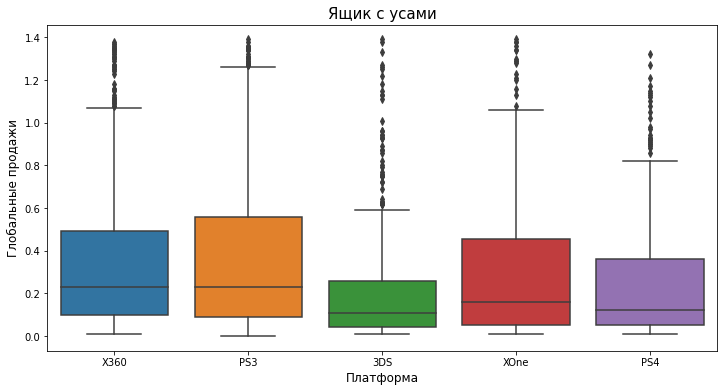

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

###  Изучим влияние оценок критиков и пользователей на продажи внутри одной платформы



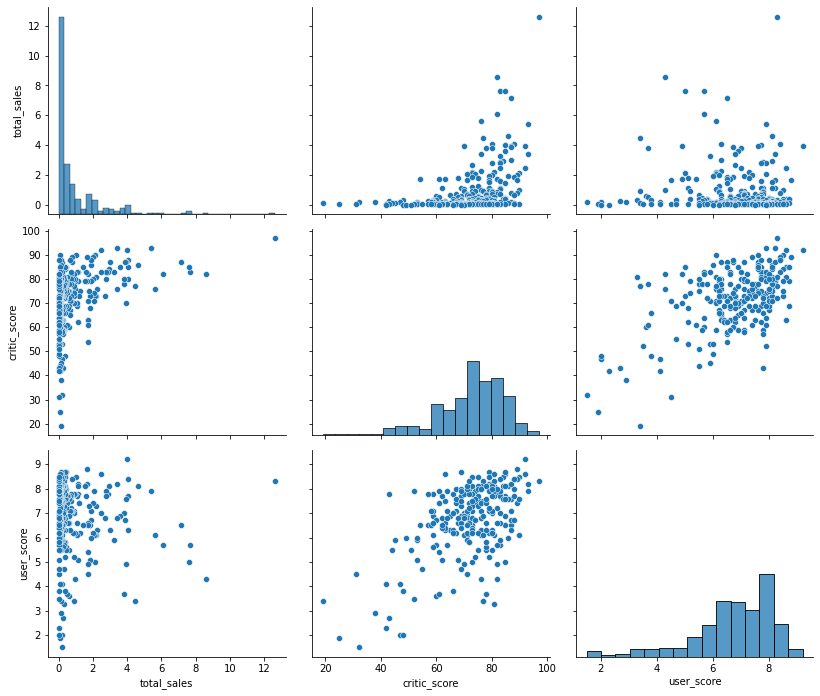

In [28]:
# диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе PS4
ps4_corr = df.query('(platform == "PS4") and (critic_score != 999) and (user_score != 999)')\
[['total_sales', 'critic_score', 'user_score']]

# построим графики
ax = sns.pairplot(ps4_corr)
ax.fig.set_size_inches(12, 10)
plt.show();

In [29]:
ps4_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


Корреляция между продажами и отзывами критиков выражена слабо (0.4), но стремится в большую сторону.
Корреляция между продажами и отзыми пользователей практически отсутствует (-0.03).
Можно предположить, что чем выше у игры будут оценки критиков, чем больше будут ее продажи. Оценка критиков имеет гораздо больший вес, чем оценка простых игроков.

### Изучим влияние оценок критиков и пользователей на продажи других платформ

#### Изучим влияние оценок критиков и пользователей на продажи  платформы PS3

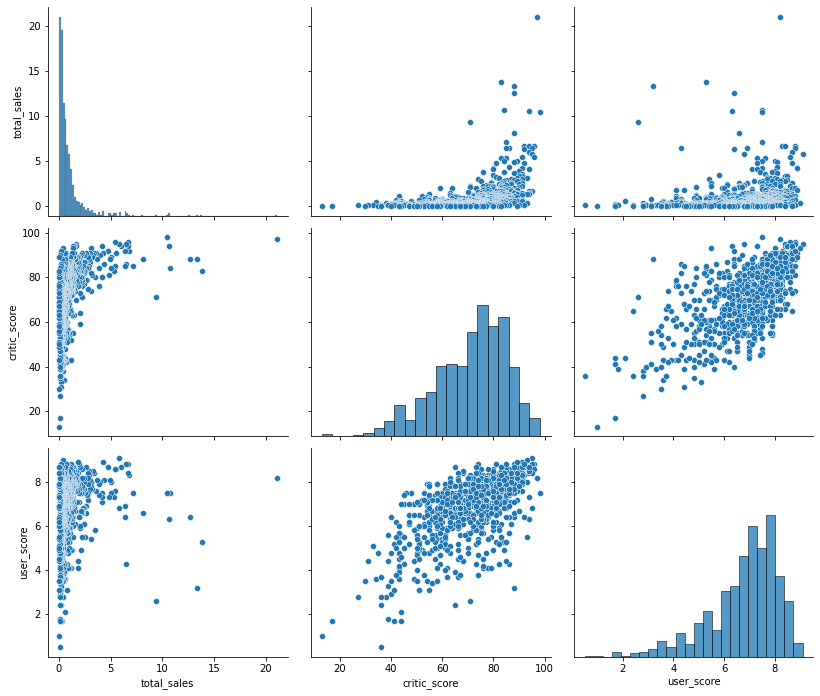

In [30]:
# диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе PS3
ps3_corr = df.query('(platform == "PS3") and (critic_score != 999) and (user_score != 999)')\
[['total_sales', 'critic_score', 'user_score']]

# нарисуем графики
ax = sns.pairplot(ps3_corr)
ax.fig.set_size_inches(12, 10)
plt.show();

In [31]:
ps3_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428213,0.143978
critic_score,0.428213,1.000000,0.631154
user_score,0.143978,0.631154,1.000000


**Вывод**

Корреляция между отзывами критиков и продажами выражена слабо (0.42). Корреляция между отзывами пользователей и продажами выражена слабо (0.14). Можно предположить, что оценки критиков играют большую роль в продажах, чем оценки пользователей.

#### Изучим влияние оценок критиков и пользователей на продажи  платформы X360


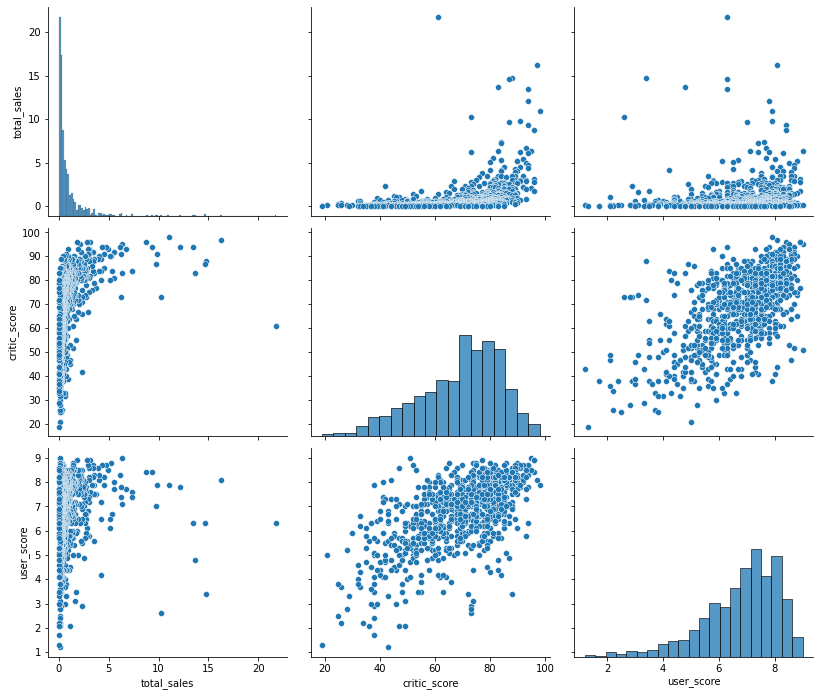

In [32]:
# диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе X360
x360_corr = df.query('(platform == "X360") and (critic_score != 999) and (user_score != 999)')\
[['total_sales', 'critic_score', 'user_score']]

# нарисуем графики
ax = sns.pairplot(x360_corr)
ax.fig.set_size_inches(12, 10)
plt.show();

In [33]:
x360_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.388992,0.11028
critic_score,0.388992,1.000000,0.62502
user_score,0.110280,0.625020,1.00000


**Вывод**
Корреляция между отзывами критиков и продажами выражена слабо (0.39). Корреляция между отзывами пользователей и Корреляция между отзывами пользователей и продажами выражена слабо (0.11)
Можно предположить, что оценки критиков имеют больший вес, чем оценки пользователей.

#### Изучим влияние оценок критиков и пользователей на продажи  платформы 3DS

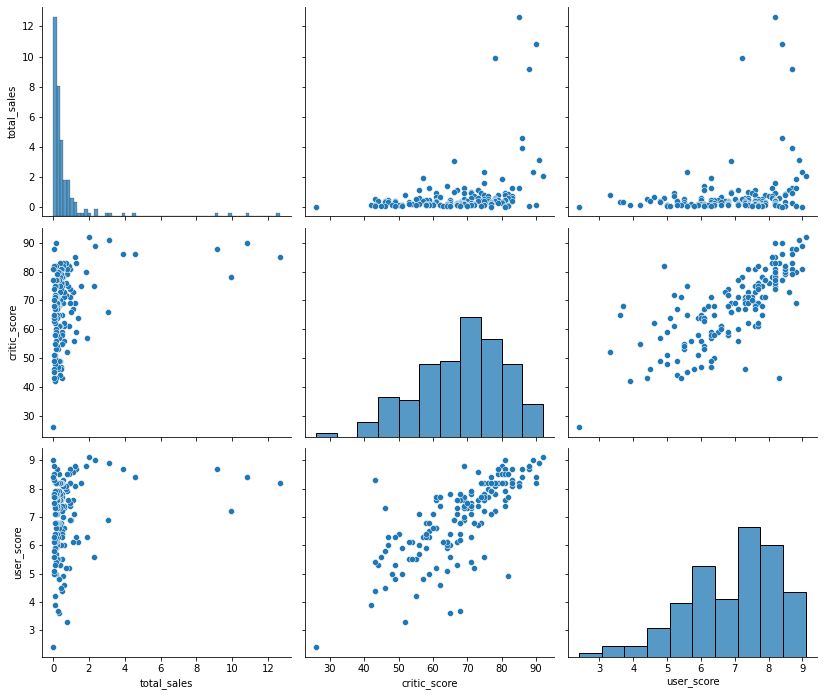

In [34]:
# диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе 3DS
ds_corr = df.query('(platform == "3DS") and (critic_score != 999) and (user_score != 999)')\
[['total_sales', 'critic_score', 'user_score']]

# нарисуем графики
ax = sns.pairplot(ds_corr)
ax.fig.set_size_inches(12, 10)
plt.show();

In [35]:
ds_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.338904,0.232089
critic_score,0.338904,1.000000,0.745222
user_score,0.232089,0.745222,1.000000


**Вывод**
Корреляция между отзывами критиков и продажами выражена слабо (0.34). Корреляция между отзывами пользователей и продажами выражена слабо (0.23). Можно предположить, что на данной платформе продажи одинаково зависят как от отзывов критиков, так и от отзывов игроков.

#### Изучим влияние оценок критиков и пользователей на продажи  платформы XOne

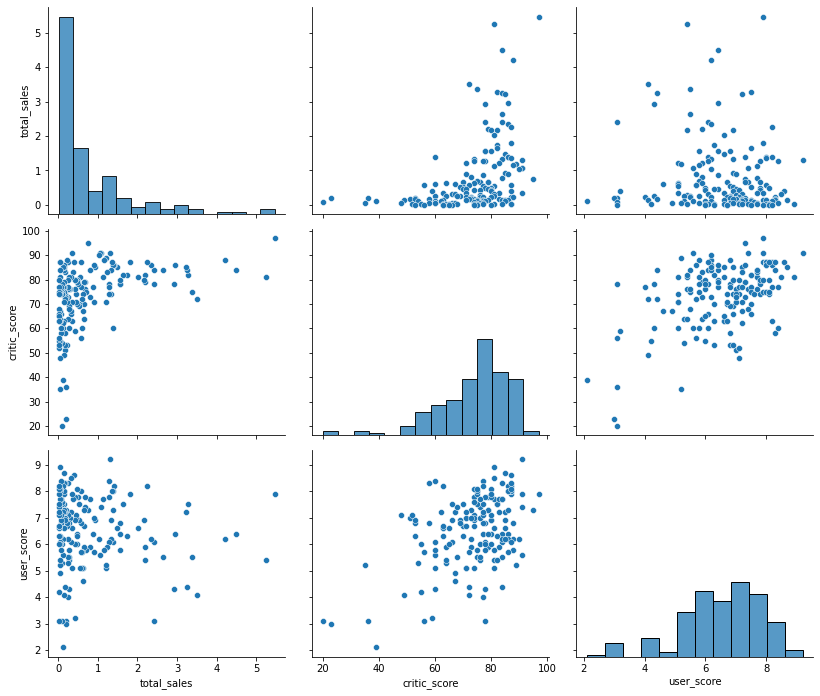

In [36]:
# диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе XOne
xone_corr = df.query('(platform == "XOne") and (critic_score != 999) and (user_score != 999)')\
[['total_sales', 'critic_score', 'user_score']]

# нарисуем графики
ax = sns.pairplot(xone_corr)
ax.fig.set_size_inches(12, 10)
plt.show();

In [37]:
xone_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.410422,-0.094003
critic_score,0.410422,1.000000,0.472462
user_score,-0.094003,0.472462,1.000000


**Вывод**
Корреляция между отзывами критиков и продажами имеет положительную тенденцию (0.41). Корреляция между отзывами пользователей и продажами выражена отрицательно (-0.09). Можно предположить, что оценки критиков влияют на продажи видеоигр, а оценки пользователей нет.

### Рассмотрим распределение игр по жанрам

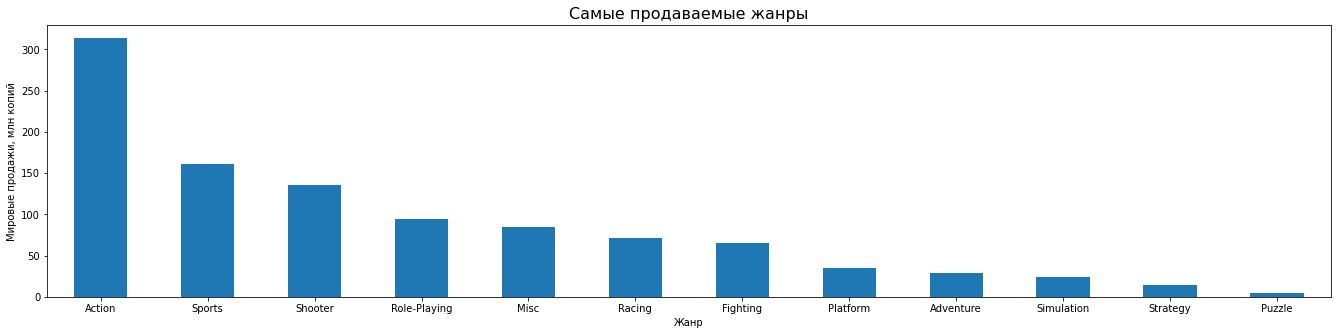

In [38]:
genre=df_top_5_platforms.groupby('genre')['total_sales'].sum().reset_index()
ax=genre.sort_values(by='total_sales', ascending=False).plot(x='genre', y='total_sales', kind='bar', figsize=(23, 5), rot=360)
ax.get_legend().remove()
plt.title('Самые продаваемые жанры', size=16)
plt.xlabel('Жанр')
plt.ylabel('Мировые продажи, млн копий')
plt.show()


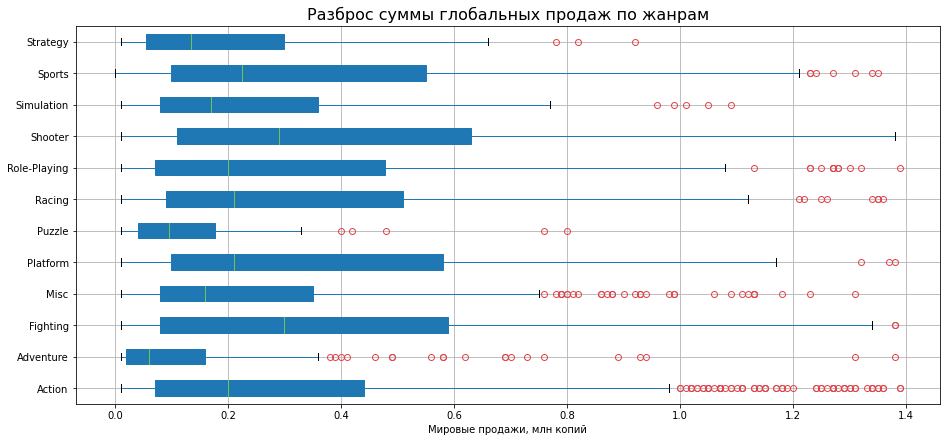

In [39]:
ax=df_top_5_platforms.boxplot(column='total_sales', by='genre', vert=False, figsize=(15,7), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
plt.suptitle('')
plt.title('Разброс суммы глобальных продаж по жанрам', size=16)
plt.xlabel('Мировые продажи, млн копий')
plt.show()

**Вывод**

Максимальные медианное значение у жанра Shooter. Следом за ним по медианному значению идет Sports. Следовательно, жанры где игры стабильно приносят стабильный доход - Shooter и Sports. 

## Шаг. Составим портрет пользователя каждого региона

###  Рассмотрим самые популярные платформы в Северной Америке, Европе, Японии и др. стран

In [40]:
def regional_top5(column, region):
    return necessary_games.pivot_table(index=column, values=region, aggfunc='sum').sort_values(by=region, ascending=False).head()

In [41]:
def regional_part_of_sales(df, name, region):
    (df.plot.pie(
        y=region, 
        legend=False, 
        pctdistance=0.5, 
        labeldistance=1.1, 
        autopct='%1.0f%%',
        figsize=(10,4), title=name))
    plt.show()

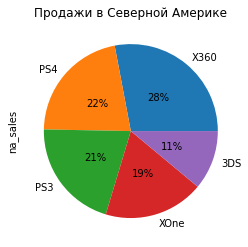

In [42]:
regional_part_of_sales(regional_top5('platform', 'na_sales'), 'Продажи в Северной Америке', 'na_sales')

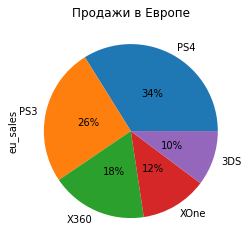

In [43]:
regional_part_of_sales(regional_top5('platform', 'eu_sales'), 'Продажи в Европе', 'eu_sales')

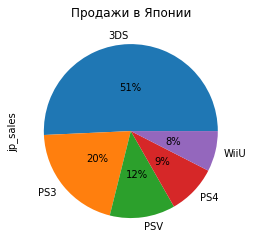

In [44]:
regional_part_of_sales(regional_top5('platform', 'jp_sales'), 'Продажи в Японии', 'jp_sales')

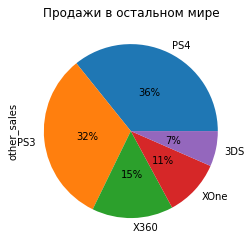

In [45]:
regional_part_of_sales(regional_top5('platform', 'other_sales'), 'Продажи в остальном мире', 'other_sales')

**Вывод**
Самой популярной консолью в Северной Америке является X360 и составляют 28%. Microsoft удерживает позиции на своем рынке. В Европе более популярна консоль от Sony, а именно PS4 и на нее приходится 34% всего европйского рынка. В Японии отдают преподчтения консолям отечественных компаний, а именно Nintendo удерживает лидирующие позиции по продажам, на них приходится 51% всего рынка. Microsoft даже не вошла в пятерку популярных консолей. В остальных странах мира лидирующую позицию занимает PS4 на нее приходится 36% всего рынка.

###  Рассмотрим самые популярные жанры в Северной Америке, Европе, Японии и др. стран

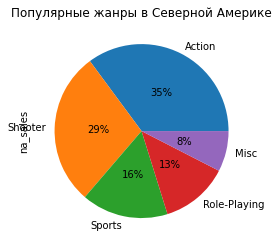

In [46]:
regional_part_of_sales(regional_top5('genre', 'na_sales'), 'Популярные жанры в Северной Америке', 'na_sales')

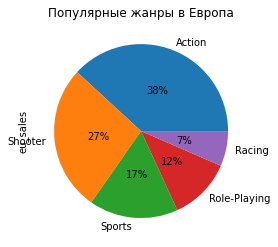

In [47]:
regional_part_of_sales(regional_top5('genre', 'eu_sales'), 'Популярные жанры в Европа', 'eu_sales')

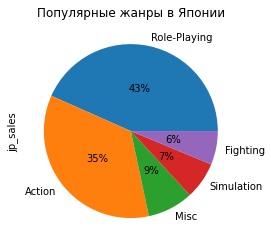

In [48]:
regional_part_of_sales(regional_top5('genre', 'jp_sales'), 'Популярные жанры в Японии', 'jp_sales')

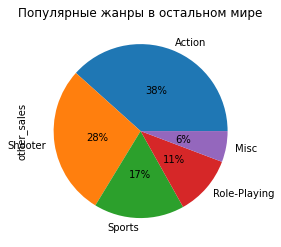

In [49]:
regional_part_of_sales(regional_top5('genre', 'other_sales'), 'Популярные жанры в остальном мире', 'other_sales')

**Вывод**

Самым популярным жанром в Северной Америке и Европе является Action, на который приходится 35% и 38% соответсвенно. А вот в Японии самым продаваемым жанром стал Role-Playing - 43%, Action уже занимает второе место - 35%. В остальном мире самым популярным жанром является Action - 38%, на втором месте по поулярности жанр - Shooter(28%).



### Оценим влияние рейтинга ESRB на продажи в отдельном регионе

- E - everyone
- EC early childhood
- E10+ - older than 10 years old
- K-A - kids to adults
- T - teen
- M - mature +17
- AO - adults only
- RP - rating pending

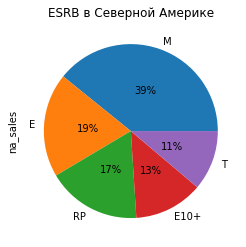

In [50]:
regional_part_of_sales(regional_top5('rating', 'na_sales', ), 'ESRB в Северной Америке', 'na_sales')

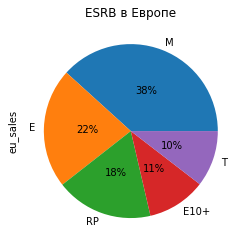

In [51]:
regional_part_of_sales(regional_top5('rating', 'eu_sales'), 'ESRB в Европе', 'eu_sales')

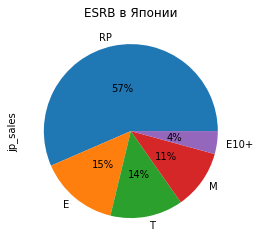

In [52]:
regional_part_of_sales(regional_top5('rating', 'jp_sales'), 'ESRB в Японии', 'jp_sales')

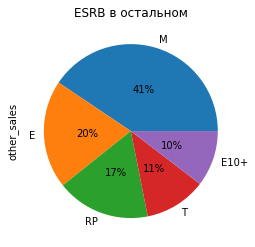

In [53]:
regional_part_of_sales(regional_top5('rating', 'other_sales'), 'ESRB в остальном', 'other_sales')

**Вывод**

В Северной Америке большая доля игр приходится на игры с рейтингом М(для взрослых) - 39% и на игры с рейтингом Е(для всех) - 19%. Похожая ситуация и в Европе - популярны игры с рейтингами М и Е, 38% и 22% соответствено. В Японии же на втором месте по популярности игры с рейтингом Е(для всех), их доля составляет 15% и первое место занимают игры без рейтинга - 57%. В остальном мире подобная ситауция с рейтингами в Европе и Северной Америке, на долю игр с рейтингом М и Е приходится 41% и 20%.

## Шаг. Проверим гипотезы

###  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В данной проверке гипотезы, мы рассматриваем две генеральные совокупности - игры для платформ XBox и PC 

Нулевая гипотеза H₀:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза H₁:

- Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [54]:
# сохраним в переменных xbox_hyp и pc_hyp актуальные данные за последние 5 лет
xone_hyp = necessary_games[necessary_games['platform'] == 'XOne']
pc_hyp = necessary_games[necessary_games['platform'] == 'PC'] 

In [55]:
# рассчитаем дисперсию генеральных совокупностей по XOne и PC
variance1 = np.var(xone_hyp['user_score'], ddof=1)
print('Дисперсия - ', variance1)

Дисперсия -  191777.7147154472


In [56]:
variance2 = np.var(pc_hyp['user_score'], ddof=1)
print('Дисперсия - ', variance2)

Дисперсия -  143453.42617526103


Дисперсии отличаются более чем на 5 % - разница существенная, поэтому в тесте необходимо указать параметр equal_var = False.

In [57]:
alpha = .01
results = st.ttest_ind(pc_hyp['user_score'], xone_hyp['user_score'], nan_policy='omit', equal_var = False)
print('значение p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем Нулевую гипотезу')
else:
    print('Не получилось отвергнуть Нулевую гипотезу')

значение p-value:  0.01886306745469485
Не получилось отвергнуть Нулевую гипотезу


**Вывод**

Значение p-value равно 4%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 4% можно получить различность рейтингов двух платформ.

### Средние пользовательские рейтинги жанров Action и Sports разные

В данной проверке гипотезы, мы рассматриваем две генеральные совокупности - игры жанров Action и Sports

Нулевая гипотеза H₀:

- Cредние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза H₁:

- Cредние пользовательские рейтинги жанров Action и Sports разные

In [58]:
action_hyp = necessary_games[necessary_games['genre'] == 'Action'] 
sports_hyp = necessary_games[necessary_games['genre'] == 'Sports']

In [59]:
# рассчитаем дисперсию генеральных совокупностей по Action, Sports
variance1 = np.var(action_hyp['user_score'], ddof=1)
print('Дисперсия - ', variance1)

Дисперсия -  246290.53220754664


In [60]:
variance2 = np.var(sports_hyp['user_score'], ddof=1)
print('Дисперсия - ', variance2)

Дисперсия -  196376.97832676506


Дисперсии отличаются более чем на 5 % - разница существенная, поэтому в тесте необходимо указать параметр equal_var = False.

In [61]:
alpha = .05
results = st.ttest_ind(action_hyp['user_score'], sports_hyp['user_score'], nan_policy='omit', equal_var = True)
print('значение p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем Нулевую гипотезу')
else:
    print('Не получилось отвергнуть Нулевую гипотезу')

значение p-value:  6.262346140568886e-11
Отвергаем Нулевую гипотезу


**Вывод**

Значение p-value очень мало, поэтому получилось опровергнуть Нулевую гипотезу. Нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится, средние пользовательские рейтинги различаются.

# Общий вывод

При работе с проектом были выполнены  следующие шаги:
1. Изучены общая информация и файлы с данными.
2. Проведена подготовка данные подготовлены: скорректированы названия всех колонок, произведено изменение типа данных, обработаны пропуски, посчитаны суммарные продажи во всех регионах.
3. Проведен исследовательский анализ данных: изучено сколько игр выпускалось в разные годы, изменение продаж по платформам, лидирующие платформы по продажам, разброс суммы глобальных продаж, влияние отзывов на уровень продаж, общее распределение игр по жанрам.
4. Составлен портрет пользователя каждого региона по критериям: самые популярные платформы, самые популярные жанры, влияние рейтинга ESRB на продажи в отдельном регионе.
5. Проверены гипотезы: средние пользовательские рейтинги платформ Xbox One и PC и средние пользовательские рейтинги жанров Action и Sports.

При планировании продаж на 2017 год стоит принять во внимание следующие аспекты:
- жизненный цикл продукта для консоли составляет на 10 лет;
- пик продаж наступает примерно через 5 лет после выпуска консоли;
- сумма продаж за последние 5 лет колеблется незначительно - 400-600 млн копий;
- ТОП-5 платформ, выпускающих игры в настоящий момент - PS4, PS3, X360, 3DS, XOne;
- увеличение выпускаемых игр наблюдается по платформе - PS4;
- максимальное медианное значение по продажам у платформ - X360 и PS3;
- оценки как критиков, так и пользователей игр не имеют сильного влияния на объемы продаж, тут вероятнее всего выходит на первый план маркетинговая раскрутка игр;
- самые популярные жанры Экшн и Спорт.

В отношении каждого региона можно отметить следующее:

- наибольшие продажи происходят в странах Северной Америки, самой популярной платформой там является X360, а жанром - Action;
- рынок видео игр в Японии отличается от остального мира, там предпочитают портативные консоли и игры жанра RPG;
- в Европе и других странах мира лучше дела обстоят с покупкой игр к платформе PS, а самым популярным жанром является Action;
- наиболее продаваемыми играми являются игры рейтинга М(для взрослых).

Проверили гипотезы по ТЗ и выяснили, что:

- Гипотеза: "Средние пользовательские рейтинги платформ XOne и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

Исходя из всех данных предполагаем, что лучше всего продавать игры для таких приставок как Sony Playstation 4.
Жанр необходимо выбирать Action и выбирать игры с рейтингом М (для взрослых).
